In [1]:
import pandas as pd 
import warnings
import os # 운영체제에서 제공되는 기능을 파이썬에서 수행, 
import matplotlib.pyplot as plt # 시각화 
import numpy as np # 넘파이 

plt.style.use('fivethirtyeight')
"""
This shows an example of the "fivethirtyeight" styling, which
tries to replicate the styles from FiveThirtyEight.com.
"""

pd.options.display.max_rows = 10 
pd.set_option('display.max_columns', 100)
# 과학적 표기법(Scientific notation)
pd.set_option('float_format','{:.2f}'.format) #항상 float 형식으로
warnings.filterwarnings('ignore')
path = './'
test = pd.read_csv(path + 'test.csv')
train = pd.read_csv(path + 'train.csv')
schools = pd.read_csv(path + 'schools.csv')
subways = pd.read_csv(path + 'subways.csv')
submission = pd.read_csv(path + 'submission.csv')


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1601458 entries, 0 to 1601457
Data columns (total 25 columns):
key                                   1601458 non-null int64
apartment_id                          1601458 non-null int64
city                                  1601458 non-null int64
transaction_year_month                1601458 non-null int64
transaction_date                      1601458 non-null object
year_of_completion                    1601458 non-null int64
exclusive_use_area                    1601458 non-null float64
floor                                 1601458 non-null int64
latitude                              1601458 non-null float64
longitude                             1601458 non-null float64
address_by_law                        1601458 non-null int64
total_parking_capacity_in_site        1509645 non-null float64
total_household_count_in_sites        1601458 non-null int64
apartment_building_count_in_sites     1601458 non-null int64
tallest_building_in_site

In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3918 entries, 0 to 3917
Data columns (total 25 columns):
key                                   3918 non-null int64
apartment_id                          3918 non-null int64
city                                  3918 non-null int64
transaction_year_month                3918 non-null int64
transaction_date                      3918 non-null object
year_of_completion                    3918 non-null int64
exclusive_use_area                    3918 non-null float64
floor                                 3918 non-null int64
latitude                              3918 non-null float64
longitude                             3918 non-null float64
address_by_law                        3918 non-null int64
total_parking_capacity_in_site        3547 non-null float64
total_household_count_in_sites        3918 non-null int64
apartment_building_count_in_sites     3918 non-null int64
tallest_building_in_sites             3917 non-null float64
lowest_build

In [6]:
subways.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405 entries, 0 to 404
Data columns (total 5 columns):
station_id        405 non-null int64
latitude          405 non-null float64
longitude         405 non-null float64
subway_line       405 non-null object
address_by_law    396 non-null float64
dtypes: float64(3), int64(1), object(1)
memory usage: 15.9+ KB


In [8]:
subways.head()

,station_id,latitude,longitude,subway_line,address_by_law
0,1,37.56,126.97,"1,4,KJ,AP",1114012000.00
1,2,37.57,126.98,"1,2",1114016700.00
2,3,37.57,126.98,1,1111012600.00
3,4,37.57,126.99,"1,3,5",1111015600.00
4,5,37.57,127.00,1,1111016300.00


In [7]:
schools.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1921 entries, 0 to 1920
Data columns (total 9 columns):
school_code        1921 non-null object
latitude           1921 non-null float64
longitude          1921 non-null float64
school_class       1921 non-null object
operation_type     1921 non-null object
highschool_type    462 non-null object
gender             1921 non-null object
foundation_date    1921 non-null object
address_by_law     1921 non-null int64
dtypes: float64(2), int64(1), object(6)
memory usage: 135.1+ KB


In [11]:
train
# train['transaction_date']
# train.transaction_date.apply(lambda x:x[-2:])

0          20
1          20
2          20
3          20
4          20
           ..
1601453    31
1601454    31
1601455    31
1601456    31
1601457    31
Name: transaction_date, Length: 1601458, dtype: object

#### interval unit을 날짜로 변환하고 set index를 날짜로 변환하는 방법

In [15]:
df = train.copy() # train 복사 
# convert interval unit to date
df['transaction_date'] = df.transaction_date.apply(lambda x: x[-2:])
# 간격 날짜 중 마지막 말일을 거래일자로 설정
# convert int to date
df['transaction_year_month'] = df['transaction_year_month'].astype(str)
# join month and date
df['transaction_year_month_date'] = df[['transaction_year_month','transaction_date']].apply(lambda x: ''.join(x), axis = 1)
# convert month and date to datetime
df['transaction_year_month_date'] = pd.to_datetime(df['transaction_year_month_date'])
# pd.to_datetime : 날짜/시간을 나타내는 문자열을 자동으로 datetime 자료형으로 바꾼 후 
# DatetimeIndex 자료형 인덱스를 생성한다. 

# datetime형식 날짜를 인덱스로 설정.
df = df.set_index(['transaction_year_month_date'])
# drop month and date
df = df.drop(['transaction_year_month', 'transaction_date'], axis = 1)

In [16]:
df

,key,apartment_id,city,year_of_completion,exclusive_use_area,floor,latitude,longitude,address_by_law,total_parking_capacity_in_site,total_household_count_in_sites,apartment_building_count_in_sites,tallest_building_in_sites,lowest_building_in_sites,heat_type,heat_fuel,room_id,supply_area,total_household_count_of_area_type,room_count,bathroom_count,front_door_structure,transaction_real_price
transaction_year_month_date,,,,,,,,,,,,,,,,,,,,,,,
2006-01-20,0,5584,1,1999,47.43,6,37.59,127.00,1111017100,163.00,136,1,8.00,4.00,individual,gas,91120,65.63,46,1.00,1.00,corridor,215000000
2006-01-20,1,5584,1,1999,44.37,8,37.59,127.00,1111017100,163.00,136,1,8.00,4.00,individual,gas,91119,61.39,10,2.00,1.00,corridor,200000000
2006-01-20,2,5059,1,1992,54.70,8,37.58,127.01,1111017400,902.00,585,5,14.00,9.00,individual,gas,8430,72.36,201,2.00,1.00,corridor,168000000
2006-01-20,3,2816,1,1993,64.66,11,37.58,127.01,1111017400,902.00,919,7,15.00,11.00,individual,gas,5839,87.30,284,2.00,1.00,corridor,165000000
2006-01-20,4,2816,1,1993,106.62,7,37.58,127.01,1111017400,902.00,919,7,15.00,11.00,individual,gas,5836,127.74,112,4.00,2.00,stairway,280000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-10-31,1605344,11500,0,1999,118.47,14,35.16,129.02,2623011100,876.00,819,8,27.00,13.00,individual,gas,44386,143.45,108,4.00,2.00,stairway,427000000
2018-10-31,1605346,16686,1,2007,59.99,4,37.50,126.94,1159010200,1651.00,1122,22,15.00,8.00,individual,gas,13884,79.98,254,3.00,2.00,stairway,771000000
2018-10-31,1605356,22243,0,2014,84.97,31,35.06,128.98,2638010600,1761.00,1326,9,35.00,27.00,individual,gas,56043,109.77,209,3.00,2.00,stairway,343000000


#### test와 train 파일 히스토그램으로 만들기

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C580015630>,
      dtype=object)

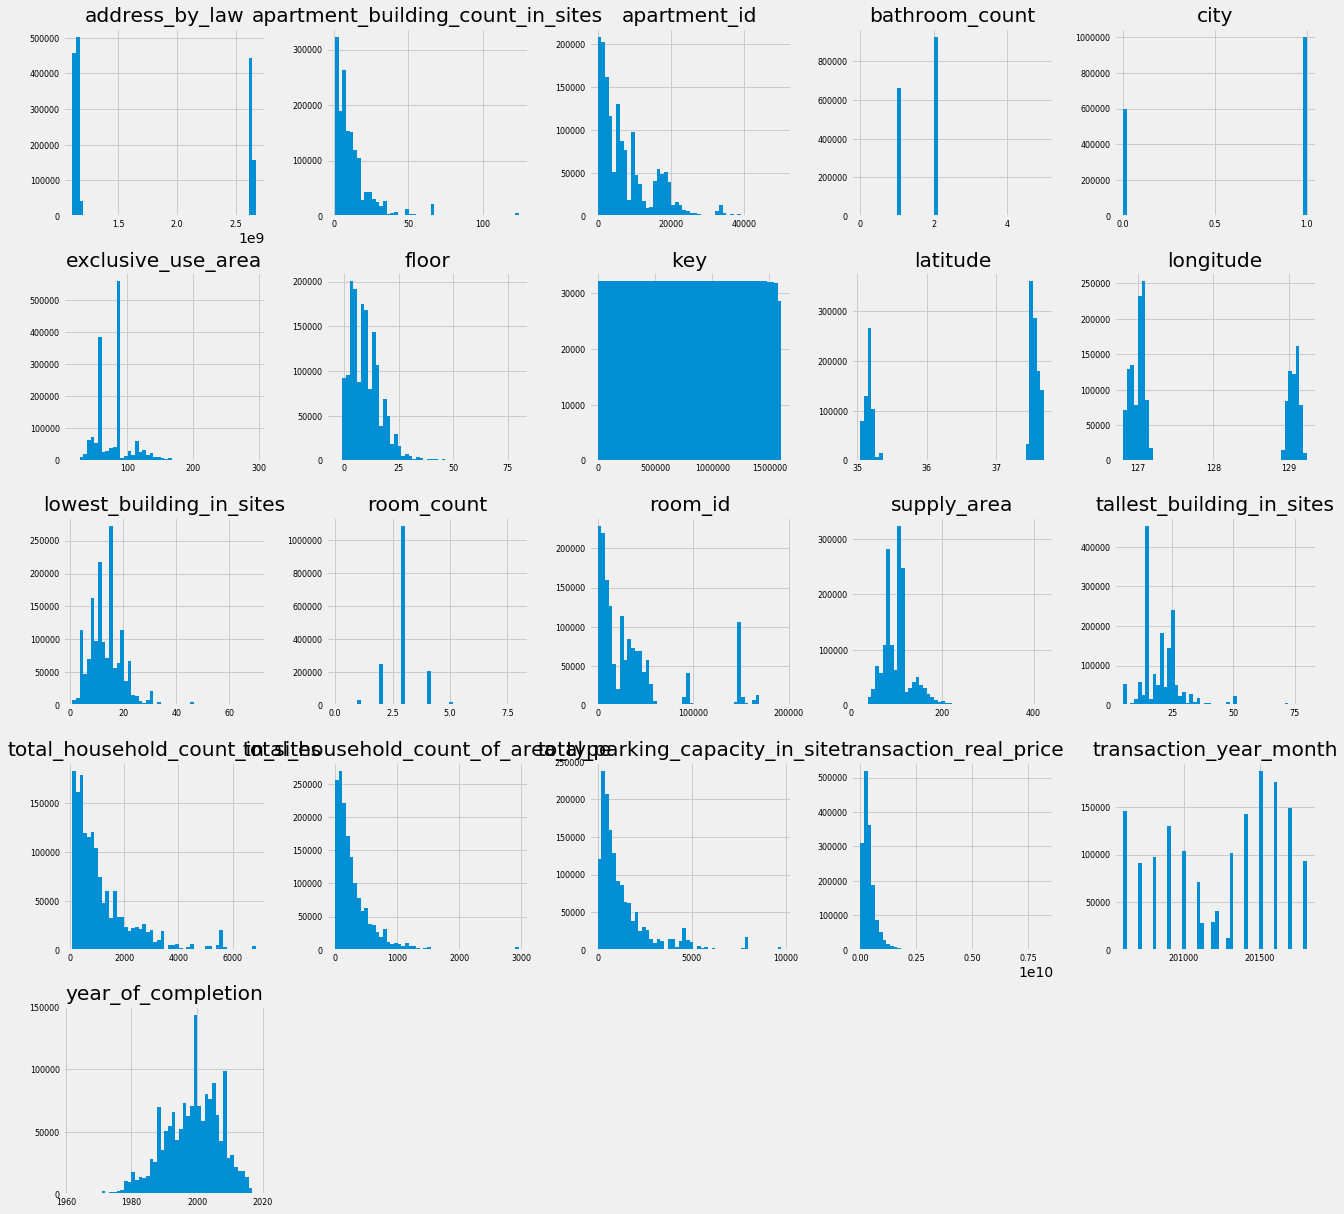

In [18]:
train.hist(figsize=(20,20), bins=50,xlabelsize = 8, ylabelsize=8)
# bins = 히스토그램의 그래프의 x축의 간격, bins = 50이면, 0~50, 51~100

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C580526FD0>,
      dtype=object)

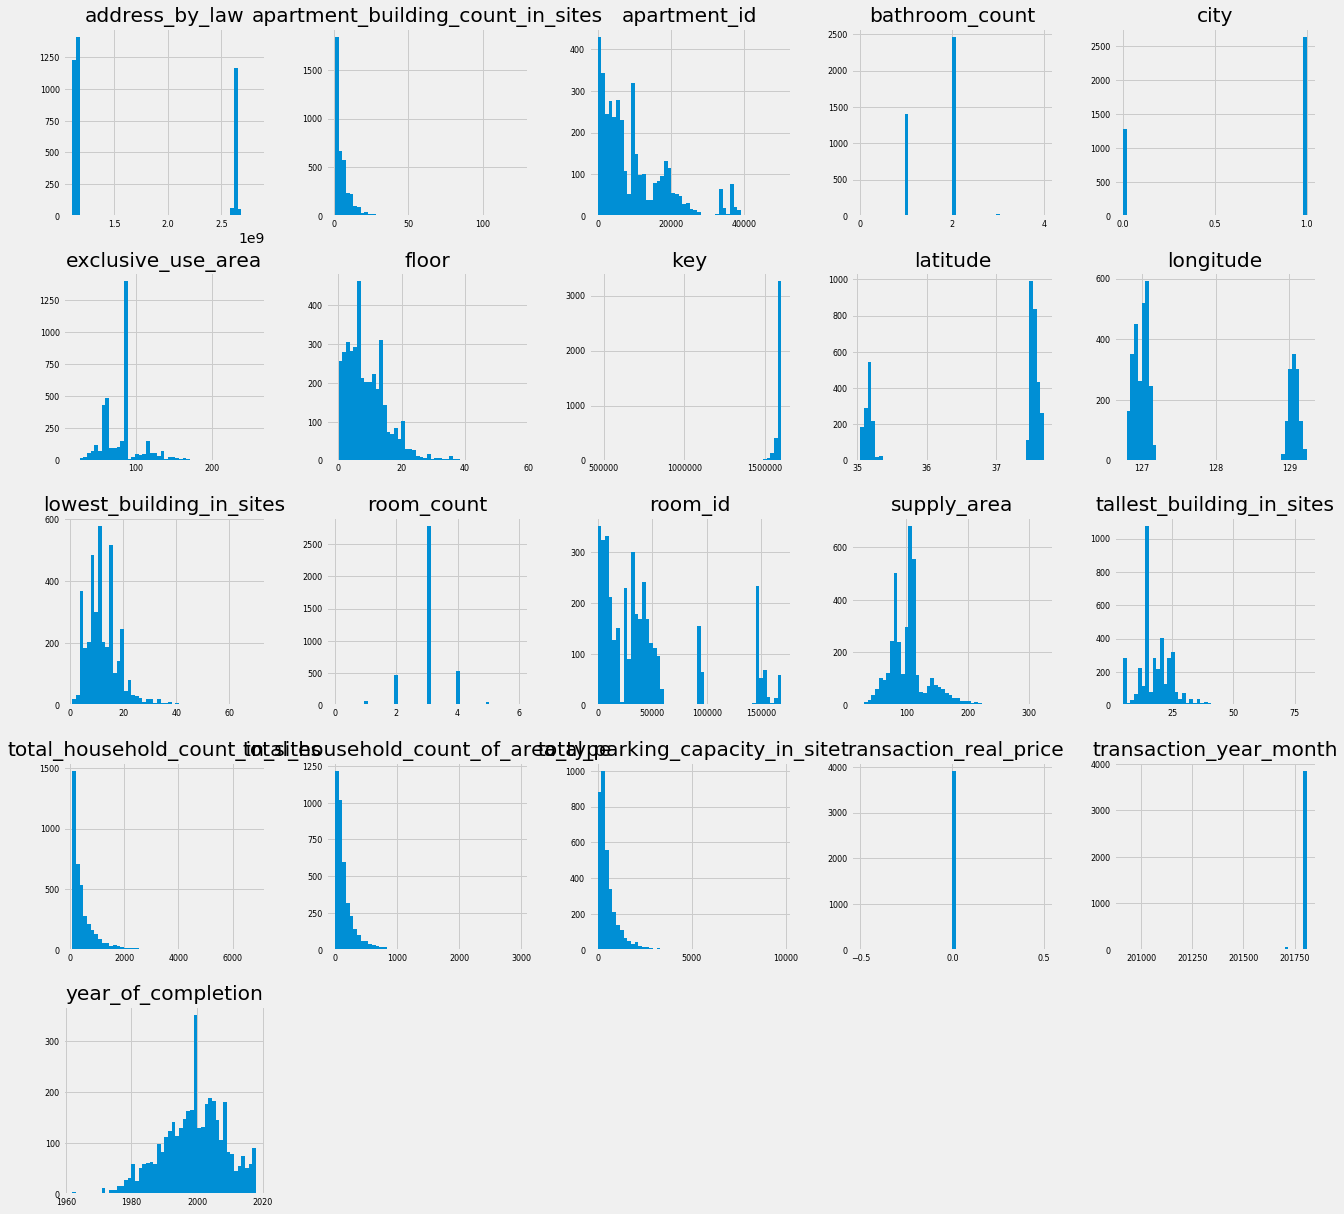

In [19]:
test.hist(figsize=(20,20), bins=50, xlabelsize=8, ylabelsize=8)